In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

df = pd.read_csv('query.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-01-19T04:35:58.590Z,39.728800,-97.947500,10.00,2.60,mb_lg,NaN,78.0,1.21100,0.68,...,2019-01-19T05:28:37.040Z,"23km ESE of Mankato, Kansas",earthquake,3.20,2.00,0.106,23.0,reviewed,us,us
1,2019-01-18T21:47:47.050Z,39.506200,-114.767500,1.00,2.70,ml,13.0,118.9,1.18900,0.14,...,2019-01-18T22:07:09.040Z,"11km N of McGill, Nevada",earthquake,NaN,13.50,NaN,NaN,automatic,nn,nn
2,2019-01-18T16:07:51.510Z,37.503833,-113.841667,5.56,2.59,ml,14.0,71.0,0.04367,0.18,...,2019-01-18T18:47:19.040Z,"13km SW of Enterprise, Utah",earthquake,0.62,0.85,0.142,5.0,reviewed,uu,uu
3,2019-01-18T15:17:29.360Z,35.316500,-97.981100,5.00,2.80,mb_lg,NaN,66.0,0.12500,1.05,...,2019-01-18T19:43:09.081Z,"3km W of Minco, Oklahoma",earthquake,1.20,1.80,0.059,74.0,reviewed,us,us
4,2019-01-18T10:20:28.330Z,32.913800,-100.889900,5.00,2.80,ml,NaN,46.0,0.03500,0.64,...,2019-01-18T16:39:38.053Z,"21km N of Snyder, Texas",earthquake,4.90,2.00,0.071,48.0,reviewed,us,us


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31754 entries, 0 to 31753
Data columns (total 22 columns):
time               31754 non-null object
latitude           31754 non-null float64
longitude          31754 non-null float64
depth              31754 non-null float64
mag                31754 non-null float64
magType            31754 non-null object
nst                19545 non-null float64
gap                30908 non-null float64
dmin               21648 non-null float64
rms                30827 non-null float64
net                31754 non-null object
id                 31754 non-null object
updated            31754 non-null object
place              31754 non-null object
type               31754 non-null object
horizontalError    26540 non-null float64
depthError         30181 non-null float64
magError           20831 non-null float64
magNst             22207 non-null float64
status             31754 non-null object
locationSource     31754 non-null object
magSource         

In [30]:
df['magType'].value_counts()

ml       23332
md        4560
mb_lg     1190
mw         778
mwr        777
mblg       381
mb         276
mh         134
mlg        115
mc          57
Md          45
mww         41
mwc         34
Ml          25
mlr          5
mwb          2
ms_20        1
m            1
Name: magType, dtype: int64

In [48]:
df_ml = df.query('magType == "ml"')
bins = np.linspace(2.5,df_ml['mag'].max(),10,endpoint=True)
df_ml['count'] = pd.cut(df['mag'], bins)
f = df_ml['count'].value_counts().sort_index()
f

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(2.5, 2.844]      10133
(2.844, 3.189]     5922
(3.189, 3.533]     3555
(3.533, 3.878]      895
(3.878, 4.222]      315
(4.222, 4.567]       84
(4.567, 4.911]       28
(4.911, 5.256]        4
(5.256, 5.6]          6
Name: count, dtype: int64

In [49]:
midpoints = [(bins[i]+bins[i+1])/2.0 for i in range(len(bins)-1)]

                            OLS Regression Results                            
Dep. Variable:                    log   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     255.5
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           9.11e-07
Time:                        12:31:15   Log-Likelihood:                -5.6563
No. Observations:                   9   AIC:                             15.31
Df Residuals:                       7   BIC:                             15.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.9880      0.799     22.502      0.0

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


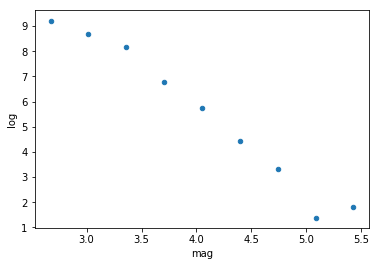

In [50]:
# df.groupby('count').count()

g = f.to_frame()

g['log']  = np.log(g['count'])
# g.info()

import matplotlib.pyplot as plt
# g.plot(kind = 'bar')
# g['log'].plot(kind='scatter')


g['mag'] = midpoints

g.plot(x = 'mag', y = 'log', kind='scatter')

result = sm.ols(formula="log ~ mag", data=g).fit()
print(result.summary())

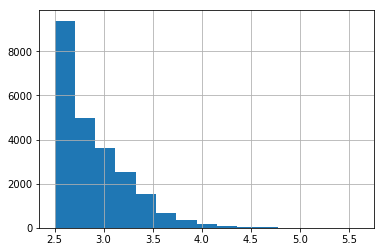

In [33]:
%matplotlib inline
df_ml['mag'].hist(bins = 15)